In [1]:
import math
import numpy as np 
import matplotlib.pyplot as plt

### Understanding Derivatives

In [2]:
# define a function f(x) - any random parabola
def f(x):
    y = 3*x**2 - 4*x + 5
    return y

In [3]:
# check the function at different values of x
print(f(0))
print(f(3))

5
20


In [4]:
xs = np.arange(-5.0, 5.0, 0.25)
xs

array([-5.  , -4.75, -4.5 , -4.25, -4.  , -3.75, -3.5 , -3.25, -3.  ,
       -2.75, -2.5 , -2.25, -2.  , -1.75, -1.5 , -1.25, -1.  , -0.75,
       -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,
        1.75,  2.  ,  2.25,  2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,
        4.  ,  4.25,  4.5 ,  4.75])

In [5]:
ys = f(xs)
ys

array([100.    ,  91.6875,  83.75  ,  76.1875,  69.    ,  62.1875,
        55.75  ,  49.6875,  44.    ,  38.6875,  33.75  ,  29.1875,
        25.    ,  21.1875,  17.75  ,  14.6875,  12.    ,   9.6875,
         7.75  ,   6.1875,   5.    ,   4.1875,   3.75  ,   3.6875,
         4.    ,   4.6875,   5.75  ,   7.1875,   9.    ,  11.1875,
        13.75  ,  16.6875,  20.    ,  23.6875,  27.75  ,  32.1875,
        37.    ,  42.1875,  47.75  ,  53.6875])

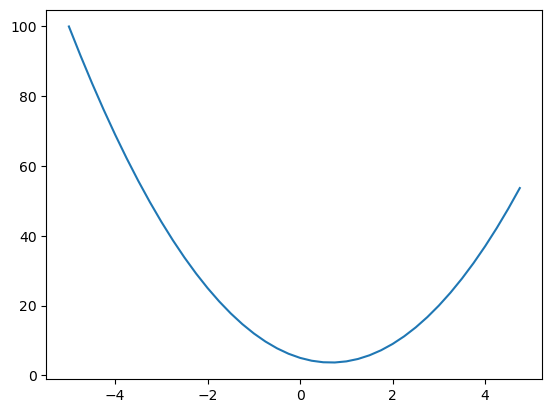

In [6]:
plt.plot(xs, ys)

In [7]:
# calculating the derivative of f(x)
# (f(x+h) - f(x))/h limit as h --> 0
# 3x^2 - 4x + 5 --> 6x - 4 
h = 0.000000000001
x = 3.0
print((f(x + h) - f(x))/h)

# answer is going to be wrong after a certain point since we are dealing with floating point
h = 0.00000000000000001
x = 3.0
print((f(x + h) - f(x))/h)

14.001244608152774
0.0


In [8]:
# when x = -3, intuitively, when x is slightly nudged in a positive direction
# f is going to decrease
# so slope is going to be negative
h = 0.0000001
x = -3
print(f(x))
print(f(x + h))
print((f(x + h) - f(x))/h)

44
43.99999780000003
-21.999999688659955


In [9]:
# f'(x) = 6x - 4 --> when x = 2/3 derivative is going to be 0
# at this point, when we nudge x in either direction - f is not going to respond
h = 0.00000001
x = 2/3
print((f(x + h) - f(x))/h)

0.0


In [10]:
# now with three variables consider the function m = a*b+c
a = 2.0
b = -3.0
c = 10.0

m = a*b + c
print(m)

4.0


In [11]:
h = 0.0001

# inputs
a = 2.0
b = -3.0
c = 10.0

m1 = a * b + c
# slightly increasing one input by h - change these to see dm/da, dm/db and dm/dc
a += h
m2 = a * b + c
print("m1 = ", m1)
print("m2 = ", m2)
print("slope = ", (m2 - m1)/h)

# dm/da = b = -3.0 
# dm/db = a = 2.0
# dm / dc = 1 

m1 =  4.0
m2 =  3.999699999999999
slope =  -3.000000000010772


### Micrograd engine

#### Forward Pass

In [12]:
class Value:
    # constructor - automatically called when object of the class is created 
    # we need to create a connective graph of expressions
    # so we need to know what values produce what values and what operator produced those values- hence _children
    # label is to understand which variable is what in the graph 
    def __init__(self, data, _children=(), _op = '', label=''): 
        self.data = data
        self._prev = set(_children)
        self._op = _op
        self.label = label
    
    # built-in function in python used to obtain printable representation of an object as a string
    def __repr__(self):
        return f"Value(data = {self.data})"
    
    # __ functions or "dunder methods" have predefined meaning and are used to define an objects behaviour
    # this method for example, defines how the + operator will behave
    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+') # passing children of out
        return out
    
    # multiply
    def __mul__(self, other):
        out = Value(self.data * other.data, (self,other), '*')
        return out


In [13]:
a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
print(a, b)
print(a + b) # same as a.__add__(b)
print(a * b) 
print(a * b + c) # same as a.__mul__(b).__add__(c)

e = a*b; e.label = 'e'
d = e+c; d.label = 'd'
f = Value(-2.0, label='f')
L = d * f
L.label = 'L'

Value(data = 2.0) Value(data = -3.0)
Value(data = -1.0)
Value(data = -6.0)
Value(data = 4.0)


In [14]:
# x = a * b + c
# print(x._prev) # children = a*b and c
# print(x._op) # what operator caused d

In [15]:
# visualize the expressions using graphviz https://pypi.org/project/graphviz/

from graphviz import Digraph
def trace(root):
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root):
    dot = Digraph(format='svg', graph_attr={'rankdir':'LR'})

    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n)) 


        dot.node(name=uid, label="{ %s | data %.4f }" % (n.label, n.data), shape='record')
        if n._op:
            dot.node(name = uid + n._op, label = n._op)
            dot.edge(uid + n._op, uid)
 
    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
    
    return dot 


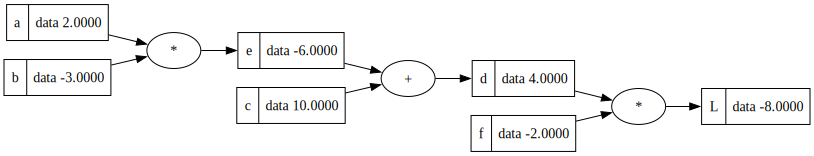

In [16]:
draw_dot(L)

#### Backward Pass

In [25]:
# Inputs: a, b, c, f
# We can see the output of the forward pass is -8.0
# We want to calculate the backward pass - the derivative of L with respect to each node. We see how change in each node affects the output. 
# backpropagation is just recursive application of the chain rule backwards through the graph 
class Value:
    def __init__(self, data, _children=(), _op = '', label=''): 
        self.data = data
        self.grad = 0.0 # default gradient 0
        self._prev = set(_children)
        self._op = _op
        self.label = label
    
    def __repr__(self):
        return f"Value(data = {self.data})"

    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+') 
        return out
    
    # multiply
    def __mul__(self, other):
        out = Value(self.data * other.data, (self,other), '*')
        return out
    
    # adding tanh for the activation 
    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1) / (math.exp(2*x) + 1)
        out = Value(t, (self, ), 'tanh')
        return out


In [26]:
a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')

e = a*b;    e.label = 'e'
d = e+c;    d.label = 'd'
f = Value(-2.0, label='f')
L = d * f;  L.label = 'L'

In [27]:
from graphviz import Digraph
def trace(root):
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root):
    dot = Digraph(format='svg', graph_attr={'rankdir':'LR'})

    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n)) 


        dot.node(name=uid, label="{ %s | data %.4f | grad %.4f}" % (n.label, n.data, n.grad), shape='record')
        if n._op:
            dot.node(name = uid + n._op, label = n._op)
            dot.edge(uid + n._op, uid)
 
    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
    
    return dot 

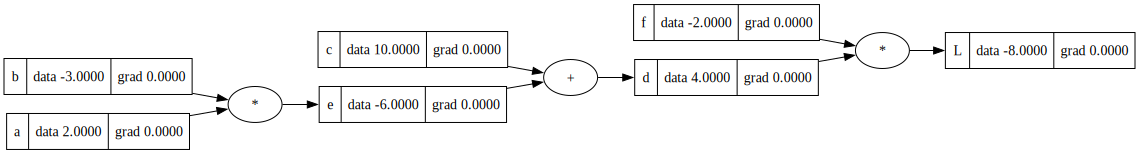

In [28]:
draw_dot(L)

In [29]:
# + nodes just route the derivative - since their local derivative is 1
# Example:
# L = d * f
# dL / dd = f = -2.00

# d = c + e
# dd / dc = 1.0

# Using chain rule
# dL / dc = dL / dd * dd / dc
# dL / dc = -2.0 * 1.0 (local derivative)
# dL / dc = -2.0
# So through the + node, the derivative -2.0 just flowed

##### Manual Backpropagation through a neuron

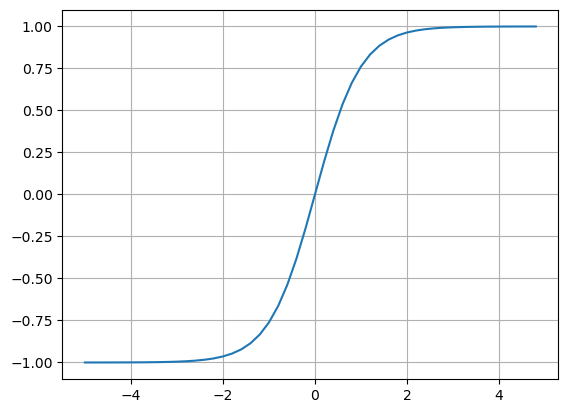

In [30]:
# neuron 
# f ( sum *wx + b)
plt.plot(np.arange(-5, 5, 0.2), np.tanh(np.arange(-5, 5, 0.2))); plt.grid();

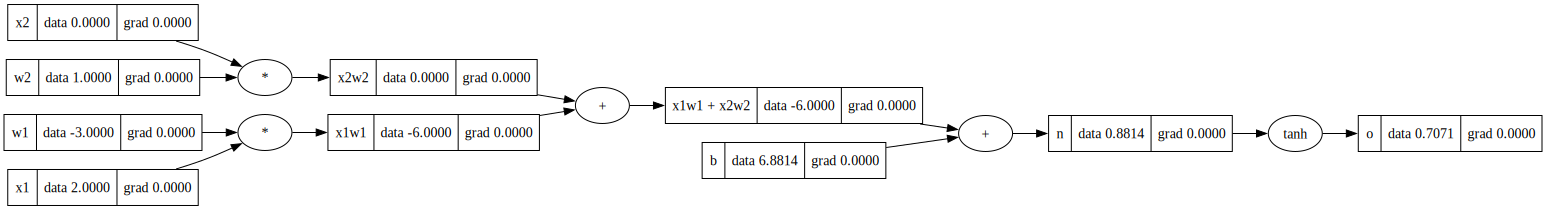

In [35]:
# inputs x1, x2
x1 = Value(2.0, label = 'x1')
x2 = Value(0.0, label = 'x2')

# weights w1, w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')

# bias b
b = Value(6.8813735870195432, label='b')

# x1w1 + x2w2 + b
x1w1 = x1*w1 
x1w1.label = 'x1w1'

x2w2 = x2*w2
x2w2.label='x2w2'

x1w1x2w2 = x1w1 + x2w2
x1w1x2w2.label = 'x1w1 + x2w2'

n = x1w1x2w2 + b
n.label = 'n'

# activation tanh
o = n.tanh()
o.label = 'o'

draw_dot(o)

In [45]:
# backpropagation
# let's make the bias value good so that our numbers come out nice

o.grad = 1.0  # do wrt o is 1

# o = tanh(n)
# do / dn = 1 = tanh(n)**2 = 1 - o**2
n.grad = 1 - o.data**2

# 0.5 through + node - just flows through the node equally 
x1w1x2w2.grad = 0.5
b.grad = 0.5

# again 0.5 will flow 
x1w1.grad = 0.5
x2w2.grad = 0.5


x2.grad = w2.data * x2w2.grad
w2.grad = x2.data * x2w2.grad

x1.grad = w1.data * x1w1.grad
w1.grad = x1.data * x1w1.grad

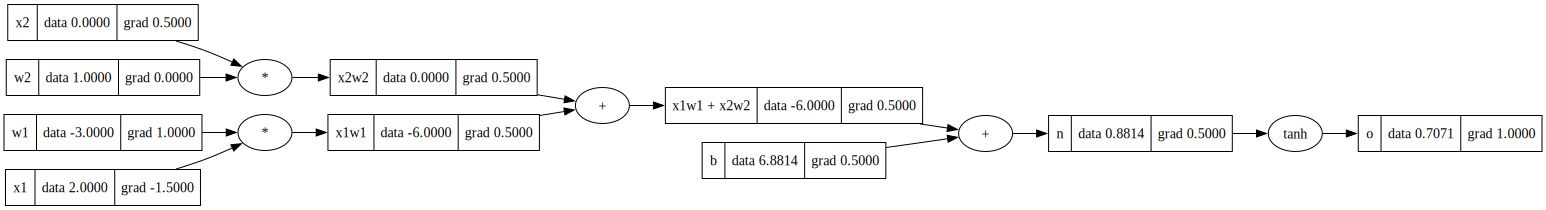

In [46]:
draw_dot(o)

##### Let's codify the backward pass

In [63]:
class Value:
    def __init__(self, data, _children=(), _op = '', label=''): 
        self.data = data
        self.grad = 0.0 # default gradient 0
        self._prev = set(_children)
        self._op = _op
        self.label = label
        self._backward = lambda: None # function does not do anything by default for the leaf nodes
    
    def __repr__(self):
        return f"Value(data = {self.data})"

    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+') 

        # we want the backward pass of out 
        # Through the plus node - the gradients will just pass through as the local derivative is 1.0 
        # self + other = out 
        def _backward():
            self.grad = 1.0 * out.grad
            other.grad = 1.0 * out.grad
        out._backward = _backward # this remembers the function definition for backward
        
        return out
    
    # multiply
    def __mul__(self, other):
        out = Value(self.data * other.data, (self,other), '*')
        # through the multiplication node 
        # self * other = out
        def _backward():
            self.grad = other.data * out.grad
            other.grad = self.data * out.grad
        out._backward = _backward
        return out
    
    # adding tanh for the activation 
    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1) / (math.exp(2*x) + 1)
        out = Value(t, (self, ), 'tanh')

        # derivative of tanh is 1 - tanh**2
        def _backward():
            self.grad = (1 - t**2) * out.grad
        out._backward = _backward
        return out

In [64]:
# inputs x1, x2
x1 = Value(2.0, label = 'x1')
x2 = Value(0.0, label = 'x2')

# weights w1, w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')

# bias b
b = Value(6.8813735870195432, label='b')

# x1w1 + x2w2 + b
x1w1 = x1*w1 
x1w1.label = 'x1w1'

x2w2 = x2*w2
x2w2.label='x2w2'

x1w1x2w2 = x1w1 + x2w2
x1w1x2w2.label = 'x1w1 + x2w2'

n = x1w1x2w2 + b
n.label = 'n'

# activation tanh
o = n.tanh()
o.label = 'o'

In [65]:
o.grad = 1.0 # setting up the base case - since in out init grad by default is 0
o._backward()  # n.grad is updated
n._backward() # b.grad and x1w1x2w2.grad is updated
b._backward() # leaf node nothing will happen 
x1w1x2w2._backward() # x1w1.grad, x2w2.grad is updated
x1w1._backward()
x2w2._backward()

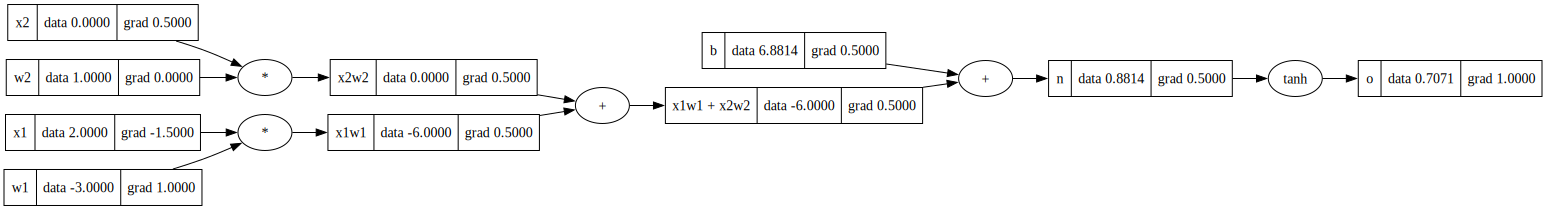

In [66]:
draw_dot(o)

In [67]:
# now instead of manually calling the backward functions through the nodes - we should automate this 
# to ensure that all the things to the right of the node are computed before we deal with this node - we need to do a "topological sort"
# TOPOLOGICAL SORT
topo = []
visited = set()
def build_topo(v):
    if v not in visited:
        visited.add(v)
        for child in v._prev:
            build_topo(child)
        topo.append(v)
build_topo(o)
topo

[Value(data = 6.881373587019543),
 Value(data = 0.0),
 Value(data = 1.0),
 Value(data = 0.0),
 Value(data = 2.0),
 Value(data = -3.0),
 Value(data = -6.0),
 Value(data = -6.0),
 Value(data = 0.8813735870195432),
 Value(data = 0.7071067811865476)]

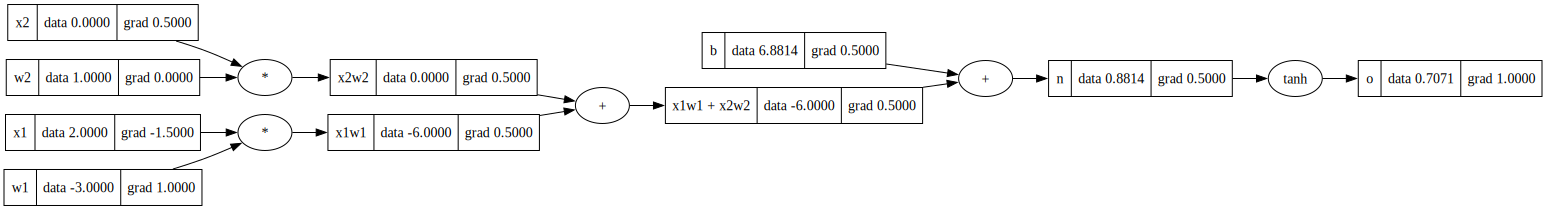

In [68]:
for node in reversed(topo):
    node._backward()
draw_dot(o)

##### Adding this topological sort and loop to the Value function

In [ ]:
class Value:
    def __init__(self, data, _children=(), _op = '', label=''): 
        self.data = data
        self.grad = 0.0 # default gradient 0
        self._prev = set(_children)
        self._op = _op
        self.label = label
        self._backward = lambda: None # function does not do anything by default for the leaf nodes
    
    def __repr__(self):
        return f"Value(data = {self.data})"

    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+') 

        # we want the backward pass of out 
        # Through the plus node - the gradients will just pass through as the local derivative is 1.0 
        # self + other = out 
        def _backward():
            self.grad = 1.0 * out.grad
            other.grad = 1.0 * out.grad
        out._backward = _backward # this remembers the function definition for backward
        
        return out
    
    # multiply
    def __mul__(self, other):
        out = Value(self.data * other.data, (self,other), '*')
        # through the multiplication node 
        # self * other = out
        def _backward():
            self.grad = other.data * out.grad
            other.grad = self.data * out.grad
        out._backward = _backward
        return out
    
    # adding tanh for the activation 
    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1) / (math.exp(2*x) + 1)
        out = Value(t, (self, ), 'tanh')

        # derivative of tanh is 1 - tanh**2
        def _backward():
            self.grad = (1 - t**2) * out.grad
        out._backward = _backward
        return out
    
    def backward(self):
        # create topological graph at self 
        topo = []
        visited = set()
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)
        build_topo(self)
        # set gradient to 1 
        self.grad = 1.0
        # in reverse topo order, calculate backward pass
        for node in reversed(topo):
            node._backward()

In [75]:
# inputs x1, x2
x1 = Value(2.0, label = 'x1')
x2 = Value(0.0, label = 'x2')

# weights w1, w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')

# bias b
b = Value(6.8813735870195432, label='b')

# x1w1 + x2w2 + b
x1w1 = x1*w1 
x1w1.label = 'x1w1'

x2w2 = x2*w2
x2w2.label='x2w2'

x1w1x2w2 = x1w1 + x2w2
x1w1x2w2.label = 'x1w1 + x2w2'

n = x1w1x2w2 + b
n.label = 'n'

# activation tanh
o = n.tanh()
o.label = 'o'

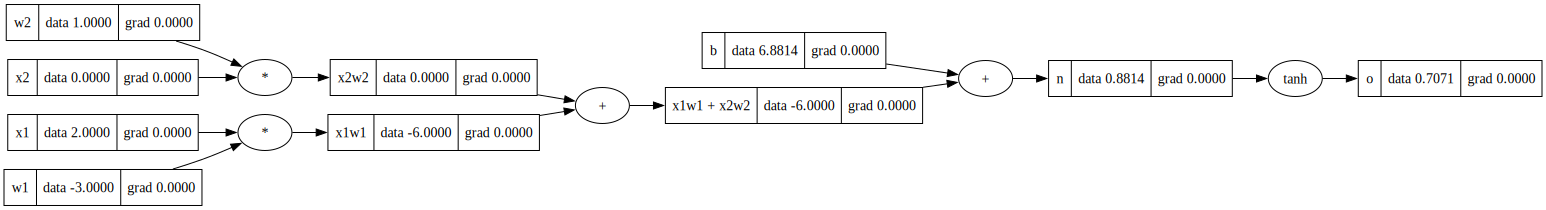

In [76]:
draw_dot(o)

In [77]:
o.backward()

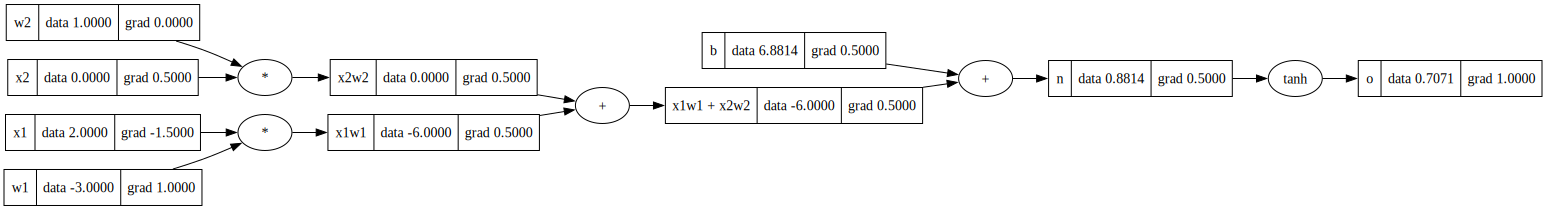

In [78]:
draw_dot(o)

##### Bug Alert

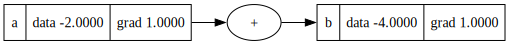

In [ ]:
a = Value(-2.0, label = 'a')
b = a + a
b.label = 'b'
b.backward() 
draw_dot(b)

In [82]:
# When the same variable is used multiple times we get incorrect results - here b = 2a so grad should have been 2 but it is 1. 
# solution is to accumulate the gradients when the same variable is encountered more than once. 
# Since we initialize the gradients at 0 - this should be fine. 
class Value:
    def __init__(self, data, _children=(), _op = '', label=''): 
        self.data = data
        self.grad = 0.0 
        self._prev = set(_children)
        self._op = _op
        self.label = label
        self._backward = lambda: None 
    
    def __repr__(self):
        return f"Value(data = {self.data})"

    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+') 
        def _backward():
            self.grad += 1.0 * out.grad
            other.grad += 1.0 * out.grad
        out._backward = _backward 
        
        return out
    
    # multiply
    def __mul__(self, other):
        out = Value(self.data * other.data, (self,other), '*')
        def _backward():
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad
        out._backward = _backward
        return out

    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1) / (math.exp(2*x) + 1)
        out = Value(t, (self, ), 'tanh')

        # derivative of tanh is 1 - tanh**2
        def _backward():
            self.grad += (1 - t**2) * out.grad
        out._backward = _backward
        return out
    
    def exp(self):
        x = self.data
        out = Value(math.exp(x), (self, ), 'exp')

        # derivative of tanh is 1 - tanh**2
        def _backward():
            self.grad += out.data * out.grad
        out._backward = _backward
        return out
    

    def backward(self):
        topo = []
        visited = set()
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)
        build_topo(self)
        self.grad = 1.0
        for node in reversed(topo):
            node._backward()

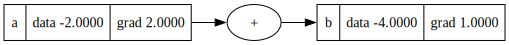

In [83]:
a = Value(-2.0, label = 'a')
b = a + a
b.label = 'b'
b.backward() 
draw_dot(b)

##### Adding some more functions to the Value class

In [118]:
# When the same variable is used multiple times we get incorrect results - here b = 2a so grad should have been 2 but it is 1. 
# solution is to accumulate the gradients when the same variable is encountered more than once. 
# Since we initialize the gradients at 0 - this should be fine. 
class Value:
    def __init__(self, data, _children=(), _op = '', label=''): 
        self.data = data
        self.grad = 0.0 
        self._prev = set(_children)
        self._op = _op
        self.label = label
        self._backward = lambda: None 
    
    def __repr__(self):
        return f"Value(data = {self.data})"

    def __add__(self, other):
        # a + 1 should be doable but it is not right now because 1 is not a Value object
        other = other if isinstance(other, Value) else Value(other) # just make other a Value object if it is not already
        out = Value(self.data + other.data, (self, other), '+') 
        def _backward():
            self.grad += 1.0 * out.grad
            other.grad += 1.0 * out.grad
        out._backward = _backward 
        return out
    
    # multiply
    def __mul__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data * other.data, (self,other), '*')
        def _backward():
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad
        out._backward = _backward
        return out
    
    def __pow__(self, other):
        assert isinstance(other, (int, float)) # support only int and float powers
        out = Value(self.data**other, (self, ), f'**{other}')
        def _backward():
            self.grad += other * (self.data ** (other-1)) * out.grad # n x^ n-1 power rule of derivatives
        out._backward = _backward
        return out
    
    # a*2 will work but 2* a will not - since it is read as a.__mul__(2) so 2.__mul__(a) is not a thing
    # so to get this done we define rmul 
    # if python cannot do 2*a it will check if by any chance a*2 is doable and it will call that 
    # rmul is a special method or a dunder method - so python sees if there is an rmul implemented 
    def __rmul__(self, other): # other * self 
        return self*other
    
    # instead of division let's implement x**k 
    # division a/b is same as a*(b**-1)
    def __truediv__(self, other):
        return self * other**-1
    
    def __neg__(self):
        return self * -1 
    
    def __sub__(self, other):
        return self + (-other)

    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1) / (math.exp(2*x) + 1)
        out = Value(t, (self, ), 'tanh')
        # derivative of tanh is 1 - tanh**2
        def _backward():
            self.grad += (1 - t**2) * out.grad
        out._backward = _backward
        return out
    
    def exp(self):
        x = self.data
        out = Value(math.exp(x), (self, ), 'exp')
        # derivative of tanh is 1 - tanh**2
        def _backward():
            self.grad += out.data * out.grad
        out._backward = _backward
        return out

    def backward(self):
        topo = []
        visited = set()
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)
        build_topo(self)
        self.grad = 1.0
        for node in reversed(topo):
            node._backward()

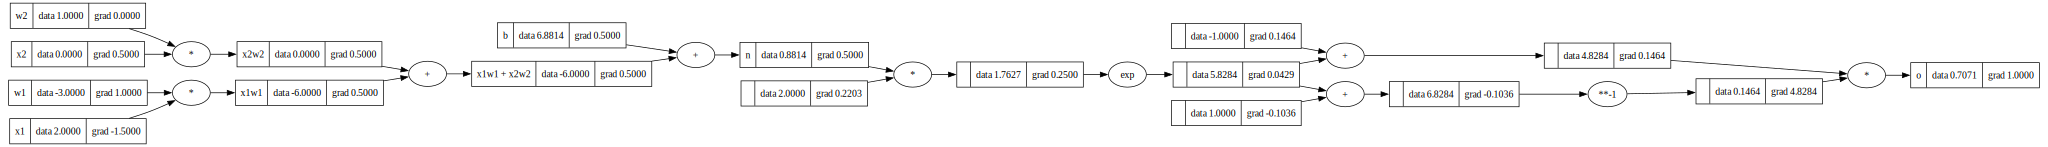

In [124]:
# inputs x1, x2
x1 = Value(2.0, label = 'x1')
x2 = Value(0.0, label = 'x2')

# weights w1, w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')

# bias b
b = Value(6.8813735870195432, label='b')

# x1w1 + x2w2 + b
x1w1 = x1*w1 
x1w1.label = 'x1w1'

x2w2 = x2*w2
x2w2.label='x2w2'

x1w1x2w2 = x1w1 + x2w2
x1w1x2w2.label = 'x1w1 + x2w2'

n = x1w1x2w2 + b
n.label = 'n'

# activation tanh
# o = n.tanh()
e = (2*n).exp()
o = (e - 1) / (e + 1)

o.label = 'o'
o.backward()
draw_dot(o)

##### Verifying with Pytorch API  

In [ ]:
import torch 

In [128]:
# forward pass
x1 = torch.Tensor([2.0]).double()   ; x1.requires_grad = True
x2 = torch.Tensor([0.0]).double()   ; x2.requires_grad = True
w1 = torch.Tensor([-3.0]).double()  ; w1.requires_grad = True
w2 = torch.Tensor([1.0]).double()   ; w2.requires_grad = True
b = torch.Tensor([6.8813735870195432]).double() ; b.requires_grad =True
n = x1*w1 + x2*w2 + b
o = torch.tanh(n)

print(o.data.item())

0.7071066904050358


In [129]:
# backward pass 
o.backward()
print('x2', x2.grad.item())
print('x1', x1.grad.item())
print('w2', w2.grad.item())
print('w1', w1.grad.item())

x2 0.5000001283844369
x1 -1.5000003851533106
w2 0.0
w1 1.0000002567688737


#### Multi-layer Perceptron